# 18.06 Problem Set 6

Due Friday, October 21 at 11am.

## Problem 1 (5+5+5+5 points)

**(a)** If $P$ is the projection matrix onto the null space of $A$, then $Py − y$, for any $y$, is in the \_\_\_\_\_\_\_\_\_\_ space of $A$.

**(b)** If $Ax = b$ has a solution $x$, then the closest vector to $b$ in $N(A^T)$ is \_\_\_\_\_\_\_\_\_\_.  (Try drawing a picture.)

**(c)** If the *rows* of $A$ (an $m \times n$ matrix) are independent, then the dimension $N(A^T A)$ is \_\_\_\_\_\_\_\_\_\_.

**(d)** If a matrix $U$ has orthonormal *rows*, then $I = \_\_\_\_\_\_\_\_\_\_$  and the projection matrix onto the row space of U is \_\_\_\_\_\_\_\_\_\_. (Your answers should be simplified expressions involving $U$ and $U^T$ only.)

## Problem 2 (5+10 points)

In class, we saw that the orthogonal projection $p$ of a vector $b$ onto $C(A)$ is given by $p = A\hat{x}$ where $\hat{x}$ is a solution to the "normal equations" $A^T A \hat{x} = A^T b$.  We showed in class that these equations are *always* solvable, because $A^T b \in C(A^T) = C(A^T A)$.  

**(a)** The least-square solution $\hat{x}$ is unique if $A$ is \_\_\_\_\_\_\_\_\_\_, in which case $A^T A$ is \_\_\_\_\_\_\_\_\_\_.

**(b)** The least-square solution $\hat{x}$ is *not* unique if $A$ is \_\_\_\_\_\_\_\_\_\_, in which case $A^T A$ is \_\_\_\_\_\_\_\_\_\_.   However, the projection $p = A\hat{x}$ is *still* unique: if you have two solutions $\hat{x}$ and $\hat{x}'$ to the normal equations, $A\hat{x} - A\hat{x}' = \_\_\_\_\_\_\_\_$ because \_\_\_\_\_\_\_\_\_\_.

## Problem 3 (5+5+10 points)

In this problem you will fit the motion of a projectile to a parabola in order to extract its velocity and the [Earth's gravitational acceleration g](https://en.wikipedia.org/wiki/Gravity_of_Earth).

If you launch a mass into the air from some position $x(0), y(0)$ with initial velocity $v_x(0), v_y(0)$, and friction is negligible, then you probably remember from 8.01 or high-school physics that the trajectory is a parabola:

$$
x(t) = x(0) + v_x(0) t
$$
$$
y(t) = \underbrace{y(0) + v_y(0) t - \frac{g}{2} t^2}_{\mbox{parabola }y(t)} = \underbrace{y(0) + \frac{v_y(0)}{v_x(0)} [x - x(0)] - \frac{g}{2v_x(0)^2} [x - x(0)]^2}_{\mbox{parabola }y(x)}
$$

The textbook *Physics2000* by E. R. Huggins contains this strobe photograph of a steel ball launched from the left, with a picture taken **every 0.1 seconds**.  The spatial grid in the background is numbered in **10s of cm** (so that the numbers "1,2,3,…,10" refer to 10cm,20cm,30cm,100cm, and the fine grid lines are 1cm).

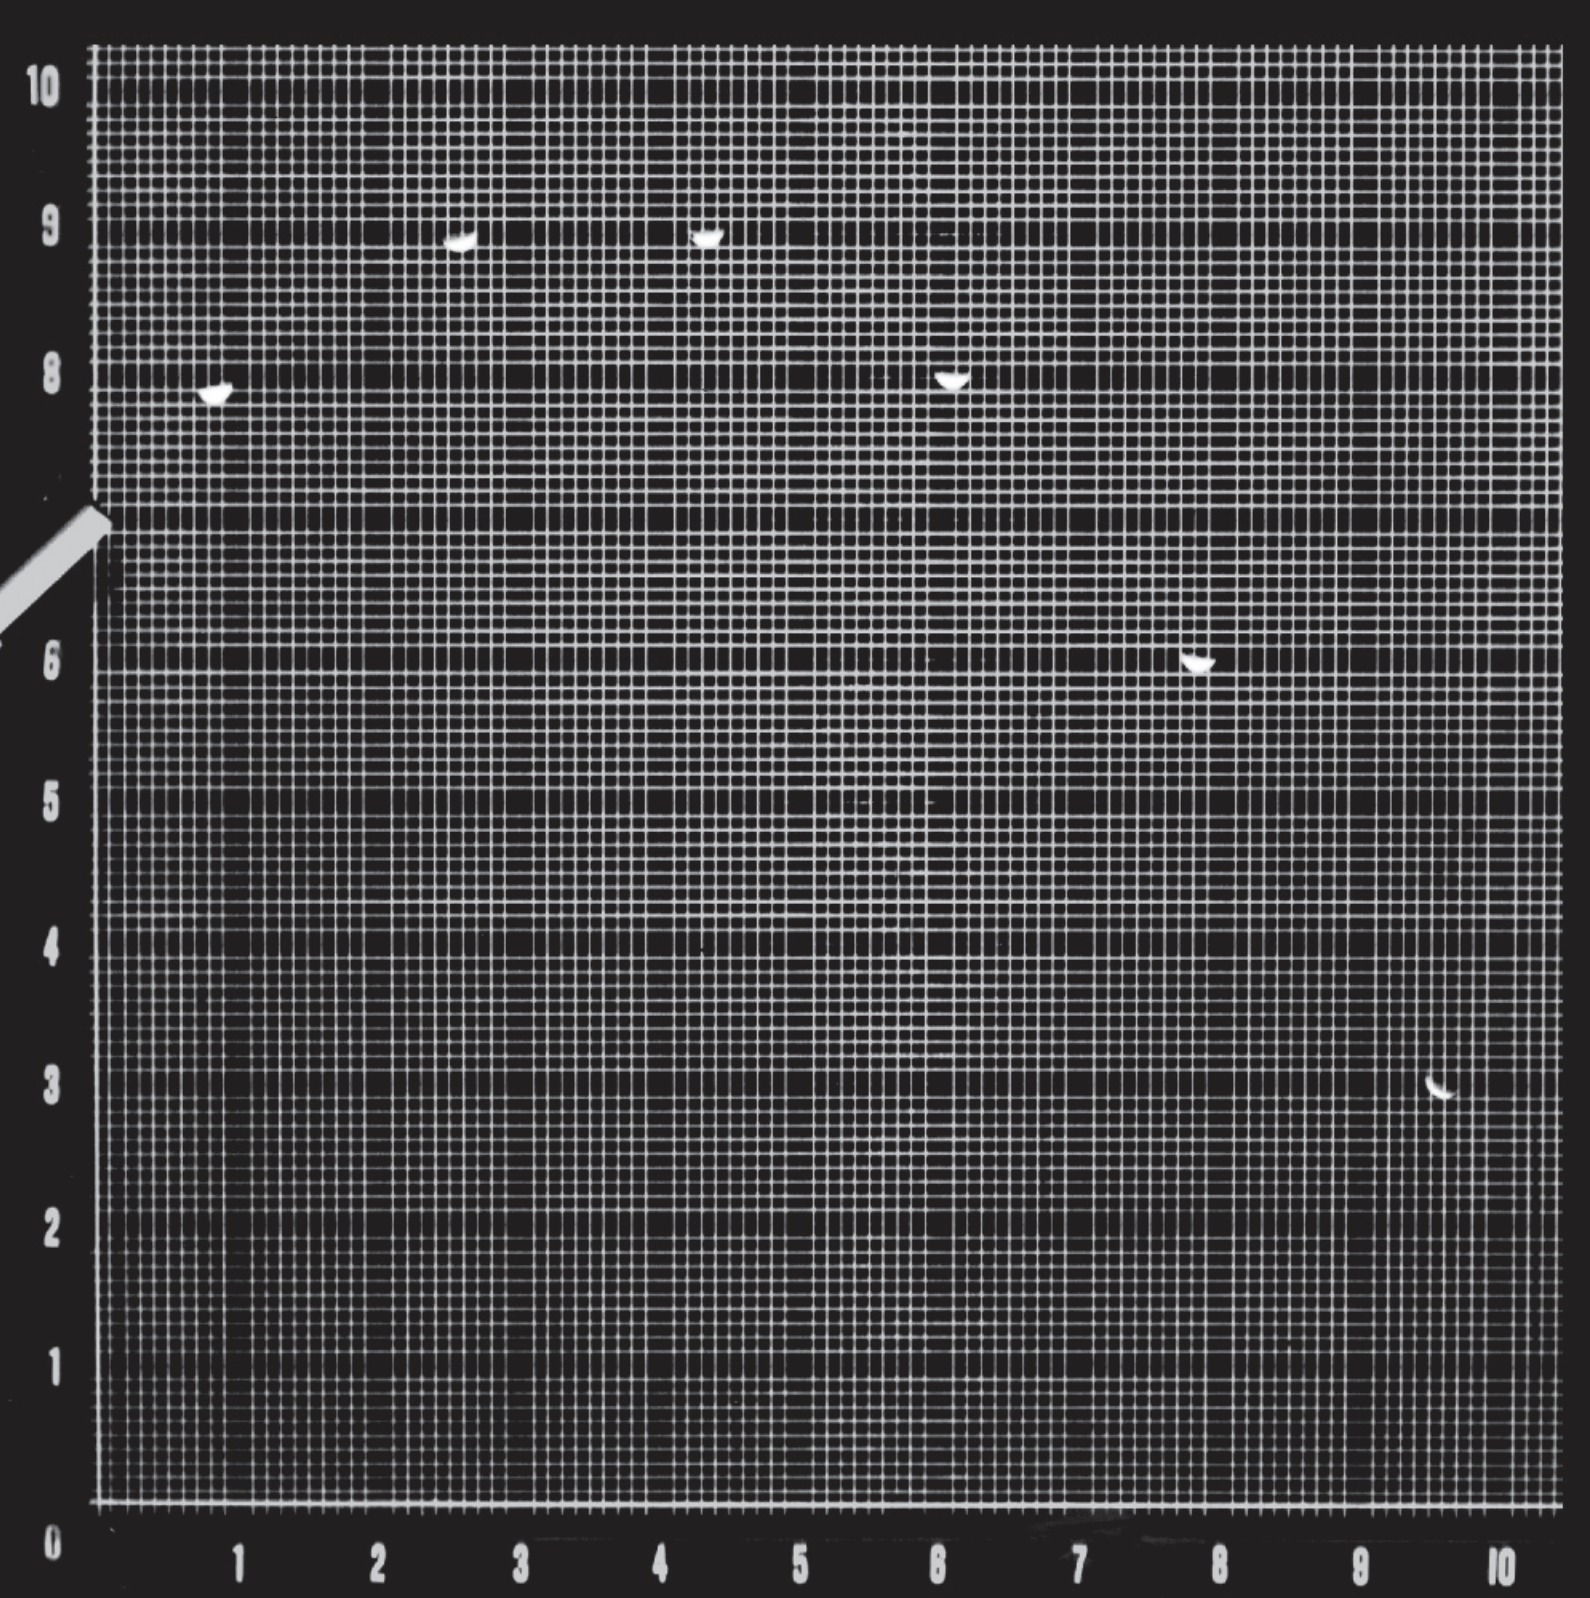

**(a)** Extract the data from the image for the 6 locations of the ball, and define Julia arrays `x = [...]`, `y = [...]`, and `t = [...]` holding the coordinates $x,y,t$ (horizontal,vertical,time) of each ball location in **meters** and **seconds**, respectively.   You can just zoom in and read the coordinates off the image by counting the fine grid lines, or use a fancier tool like [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/).  Plot the data $x(t)$ and $y(t)$.

**(b)** Perform a least-square fit to $x(0) + v_x(0) t$ to extract the velocity $v_x(0)$.  That is, define a $6\times 2$ matrix `X` so that the least-square solution `X \ x` returns the 2-component vector $[x(0), v_x(0)]$ of the unknowns.  Plot your linear fit along with the data $x(t)$.

**(c)** Perform a least-square fit to $y(0) + v_y(0) t - \frac{g}{2} t^2$ to extract the Earth's gravitational constant $g$ in m/s² (you should get *roughly* 9.8m/s²).  That is, define a $6\times 3$ matrix `Y` so that the least-square solution `Y \ y` returns the 3-component vector $[y(0), v_y(0), g]$ of the unknowns.   Plot your parabolic fit along with the data $y(t)$.

A code outline is given below; fill in the blanks:

In [ ]:
# part (a)

x = [...] # FILL IN
y = [...] # FILL IN
t = [...] # FILL IN

using PyPlot
plot(t, x, "bo-")
plot(t, y, "r*-")
xlabel("time (seconds)")
ylabel("(meters)")
legend([L"x(t)", L"y(t)"])
title("Problem 3a: Extracted x, y data")

In [ ]:
# part (b)

X = [ ... ] # for example, [t.^3 t.^0 3t.^2] makes a matrix where each row is t³ 1 3t²
xfit = X \ x  # least square solution

@show x₀ = xfit[1]
@show vx₀ = xfit[2]

plot(t, x, "bo") # data

tf = range(t[1], t[2], length=1000) # finely spaced times for plotting curves
plot(tf, x₀ .+ vx₀ .* tf, "k-") # fit ... note that we use .+, .^, .* for elementwise operations
legend(["data", "fit"])
xlabel("time (seconds)")
ylabel("(meters)")
title("Problem 3b: Linear fit of x(t)")

In [ ]:
# part (c)

Y = [ ... ] # FILL IN, SIMILAR TO part (b)
yfit = Y \ y  # least square solution

@show ... # SHOW YOUR FITTED y(0), vy(0), and g, similar to part (b)

plot(t, y, "r*") # data

... # PLOT THE PARABOLIC FIT and add labels, similar to part (b)

## Problem 4 (10+5+5 points)

Suppose we have data (e.g. from some experimental measurement) $b_1,b_2,b_3,\ldots,b_{21}$ at the 21 equally spaced times $t = −10,−9,\ldots,9,10$. All measurements are $b_k = 0$ except that $b_{11} = 1$ at the middle time $t = 0$.

**(a)** Using least squares, what are the best $c$ and $d$ to fit those 21 points by a straight line $c+dt$? 

**(b)** You are projecting the vector $b$ onto what subspace? (Give a basis.)

**(c)** Find a nonzero vector perpendicular to that subspace.

## Problem 5 (10 points)

Suppose $\hat{x}$ is the least squares solution to $Ax \approx b$ (i.e. it minimizes $\Vert Ax-b\Vert$) and $\hat{y}$ is the least
squares solution to $Ay \approx c$, where $A$ has full column rank.  Does this tell you the  least squares solution $\hat{z}$ to $Az \approx b + c$? If so, what is $\hat{z}$ and why?

## Problem 6 (5+5+5 points)

**(a)** What matrix $P$ projects every vector in $\mathbb{R}^3$ onto the line that passes through origin and $a = [3, 4, 5]$ (column vector)?

**(b)** What is the nullspace of that matrix $P$?  (Give a basis.)

**(c)** What is the row space of $P^7$?